In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df= pd.read_csv("Algerian_forest_fires_dataset.csv")

In [29]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [31]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [32]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [33]:
df.loc[:123 ,"Region"]=0
df.loc[123: ,"Region"]=1
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [35]:
df[['Region']]==df[['Region']].astype(int)

,Region
0,True
1,True
2,True
3,True
4,True
...,...
242,True
243,True
244,True
245,True


In [36]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [39]:
df=df.dropna().reset_index(drop=True)

In [40]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [42]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [43]:
df=df.drop(122).reset_index(drop=True)

In [44]:
df.iloc[[122]]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [46]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


In [49]:
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0


In [50]:
##chaange data type

In [58]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int32(6), object(8)
memory usage: 22.9+ KB


In [60]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [64]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [65]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [66]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int32(6), object(1)
memory usage: 22.9+ KB


In [69]:
df.to_csv('Algerian_forest_fire_cleaned_dataset.csv', index=False)

In [75]:
df_copy=df.drop(['day','month','year'],axis=1)

In [76]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [81]:
#onehotencoding
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [82]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [83]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

# Visvualization

In [88]:
#density plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
plt.style.use('seaborn-paper')
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

OSError: 'seaborn-paper' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [98]:
percentage=df_copy['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

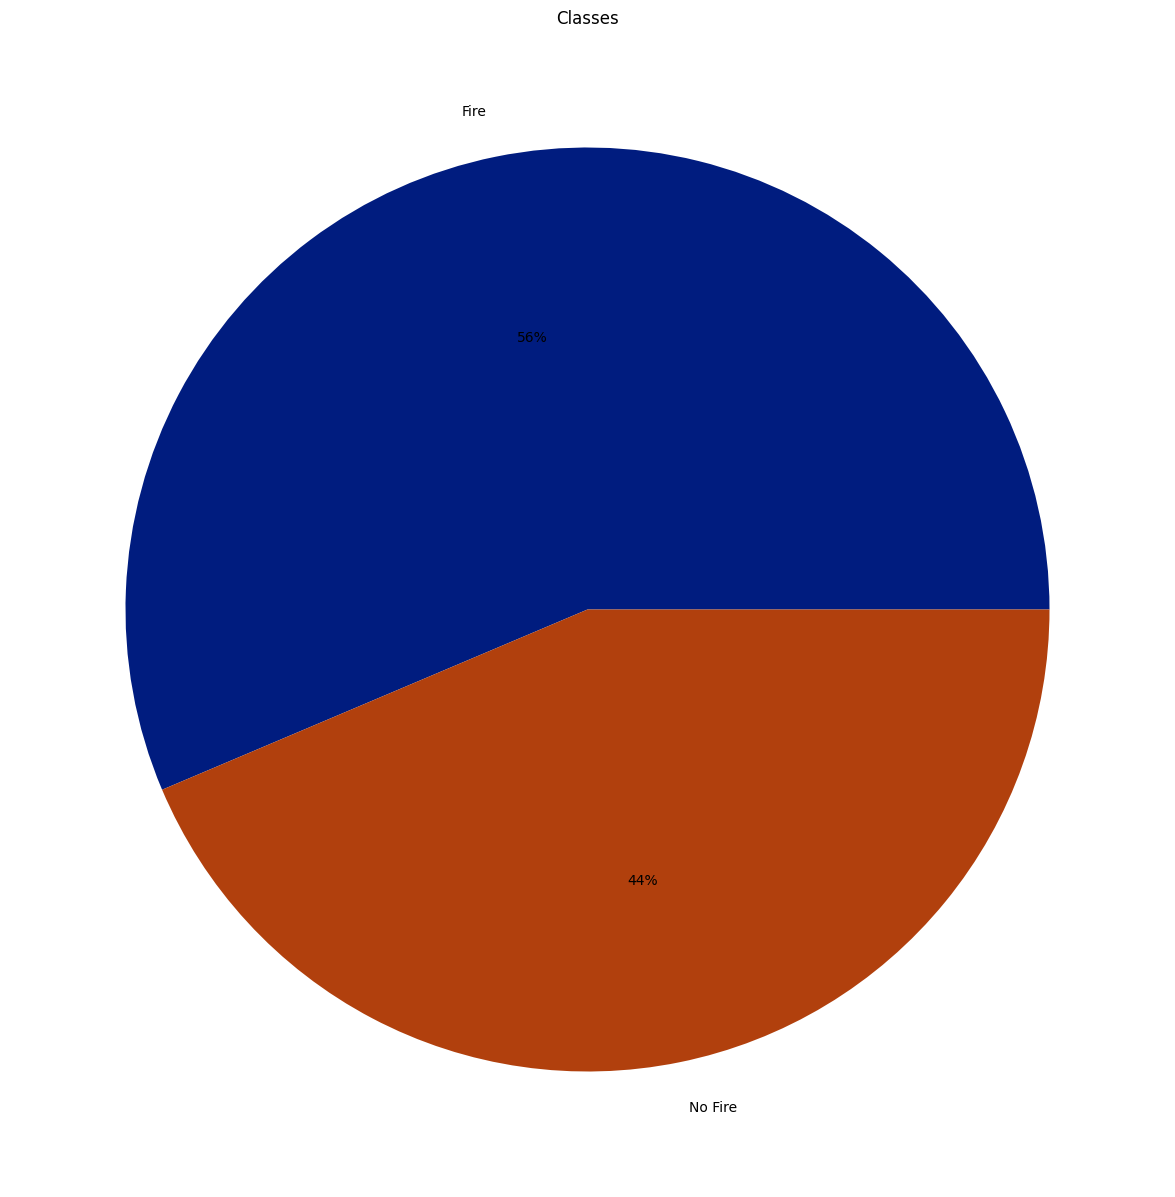

In [102]:
keys = ['Fire', 'No Fire']
palette_color = sns.color_palette('dark') 

plt.pie(percentage,colors=palette_color, labels=keys, autopct='%.0f%%') 
plt.title('Classes')
plt.show()

In [104]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

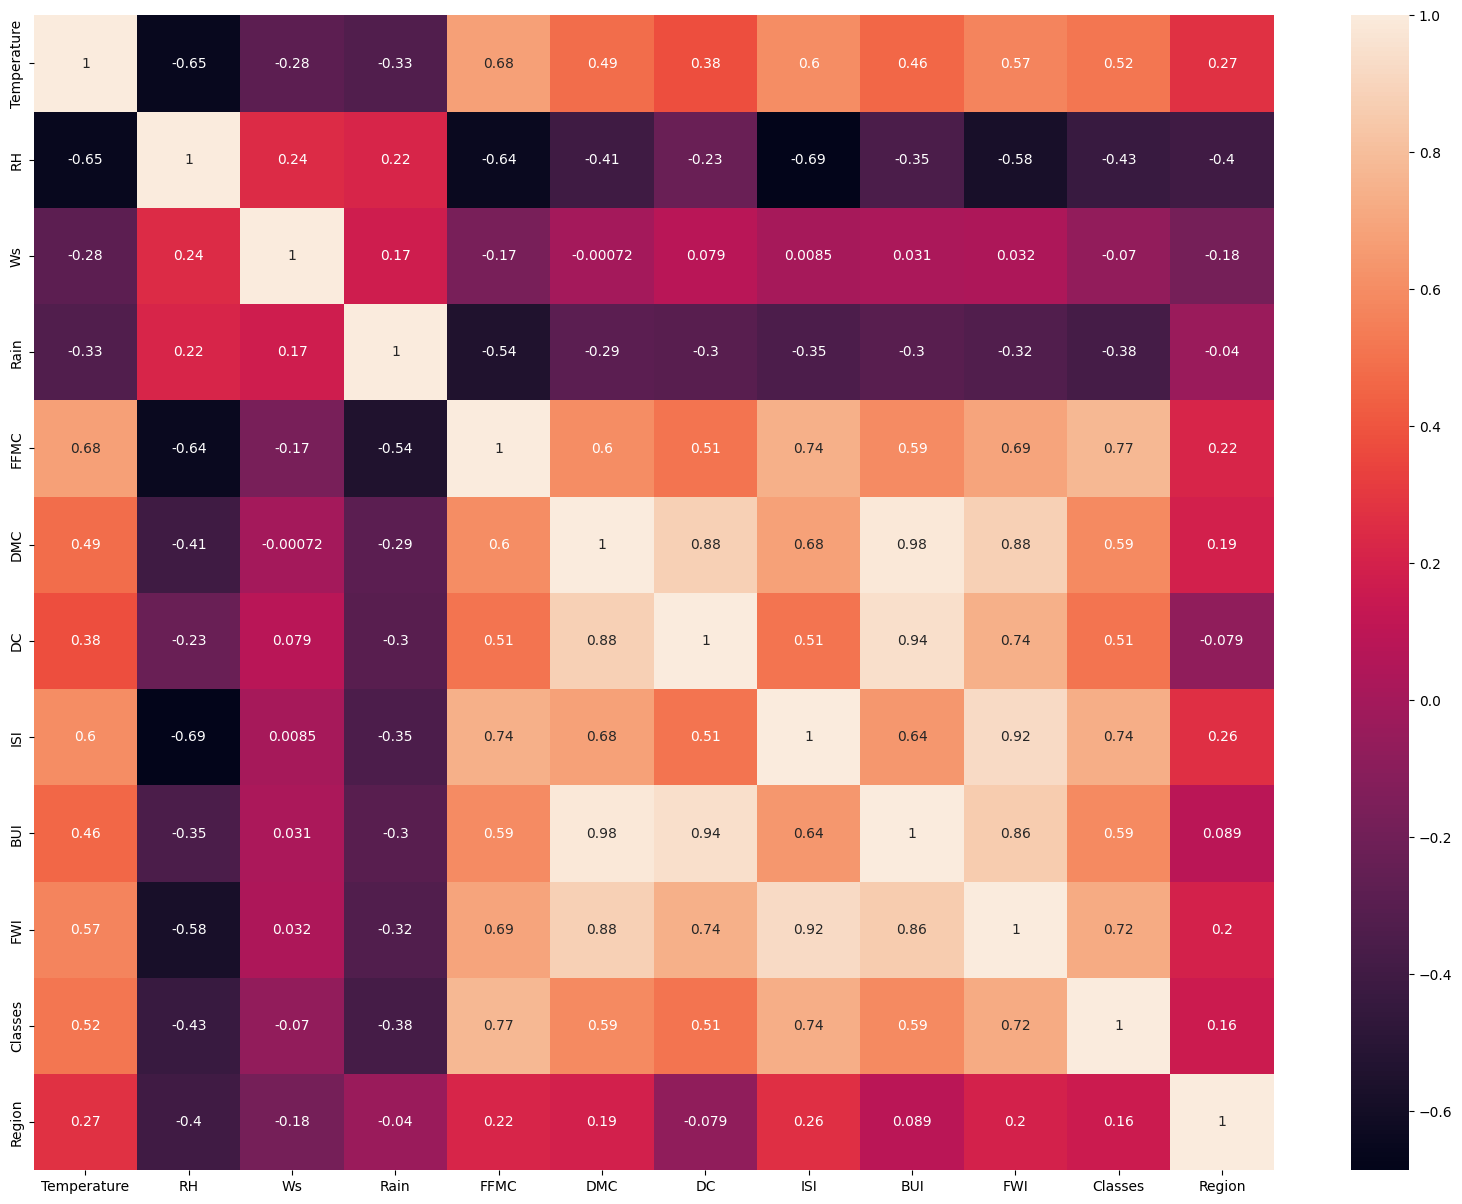

In [106]:
sns.heatmap(df_copy.corr(),annot=True)

<Axes: ylabel='FWI'>

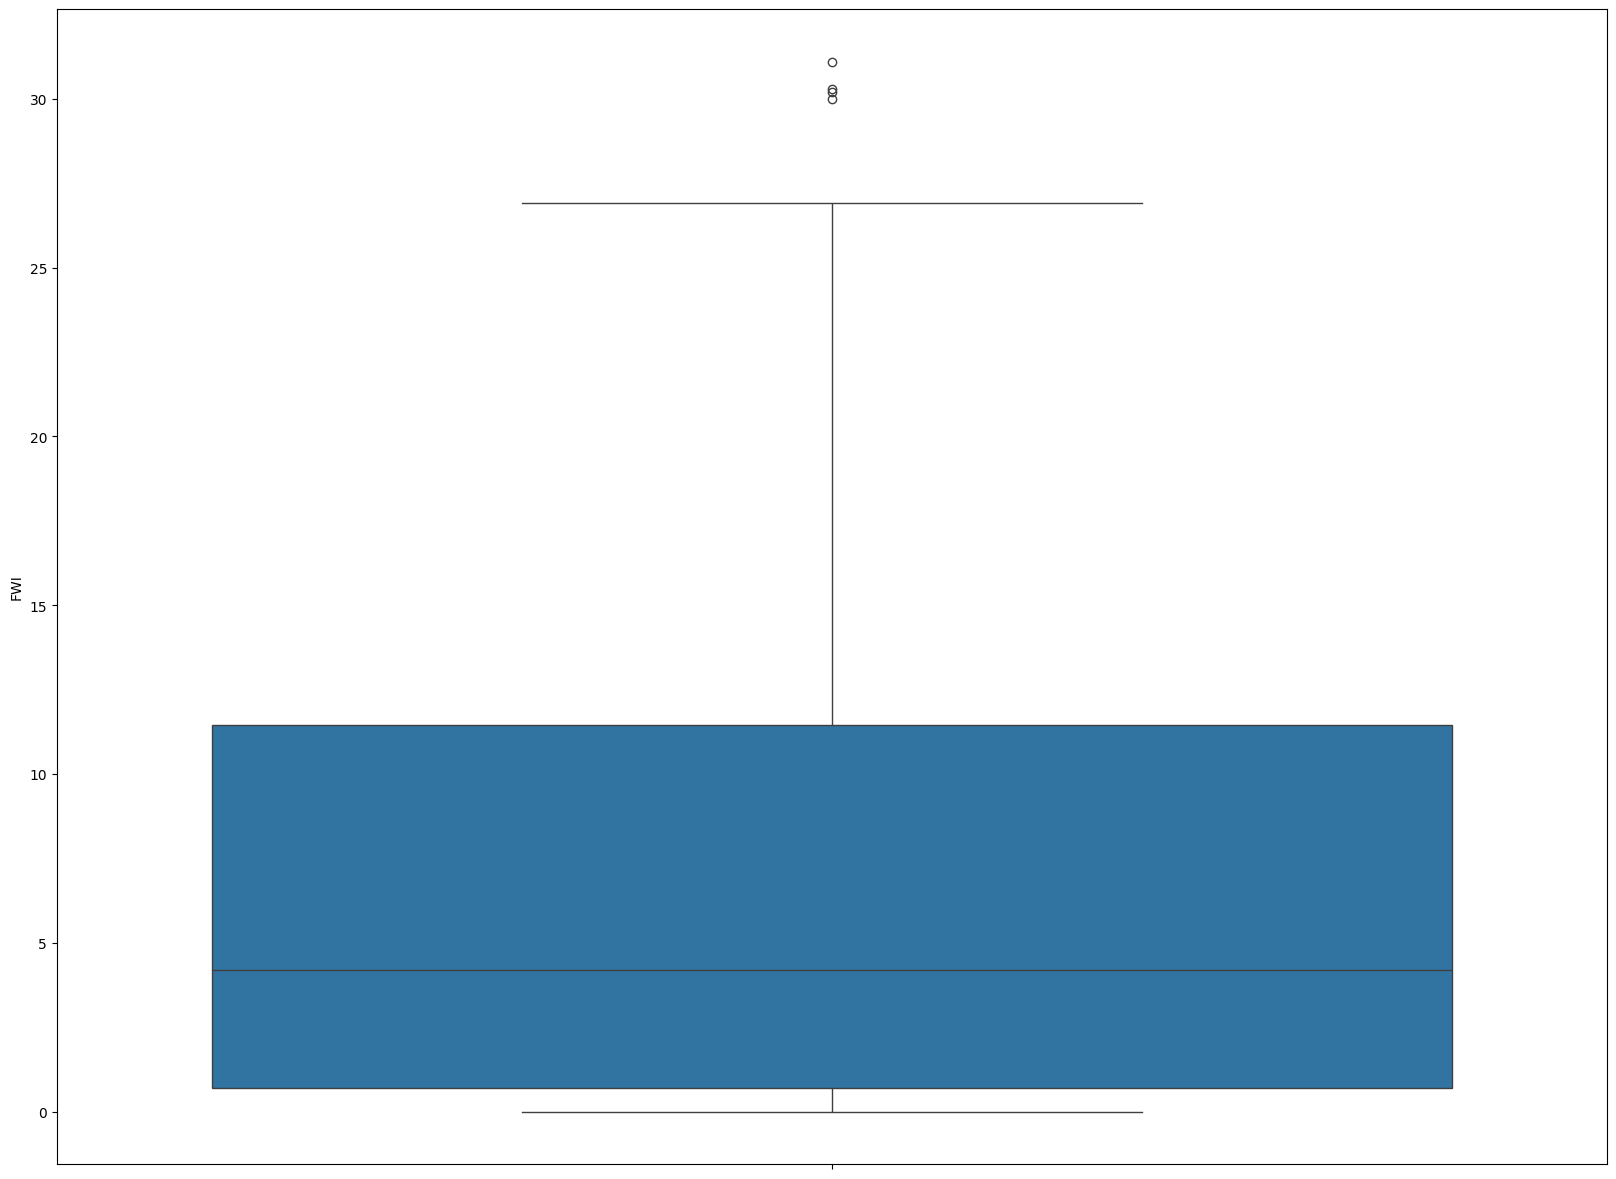

In [107]:
sns.boxplot(df_copy['FWI']) 


In [108]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


# Monthly fire analysis


In [115]:

df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

Text(0, 0.5, 'NO. OF fire')

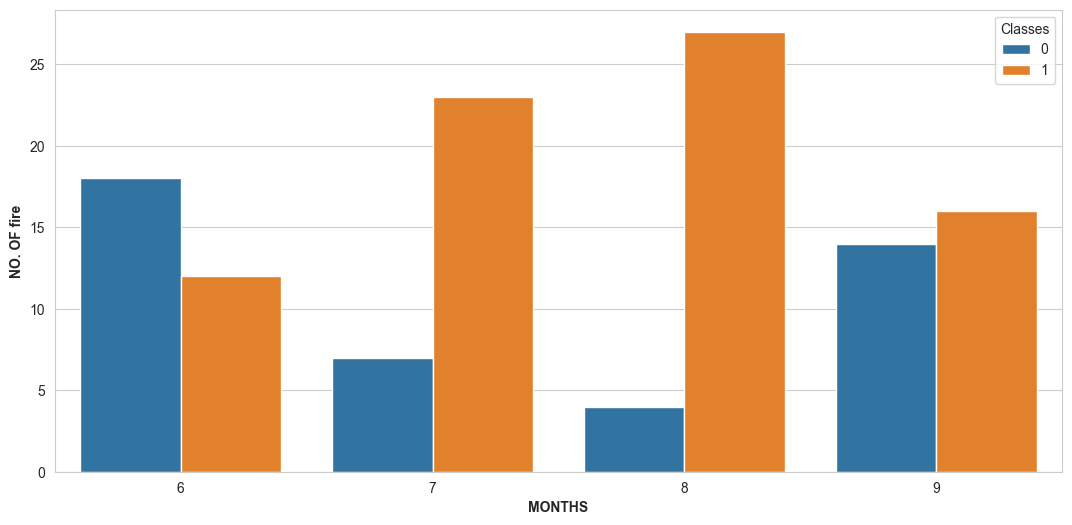

In [123]:
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
palette_color = sns.color_palette('dark') 
sns.countplot(x='month', hue='Classes',data=dftemp)
plt.xlabel('MONTHS', weight='bold')
plt.ylabel('NO. OF fire', weight='bold')

Text(0, 0.5, 'NO. OF fire')

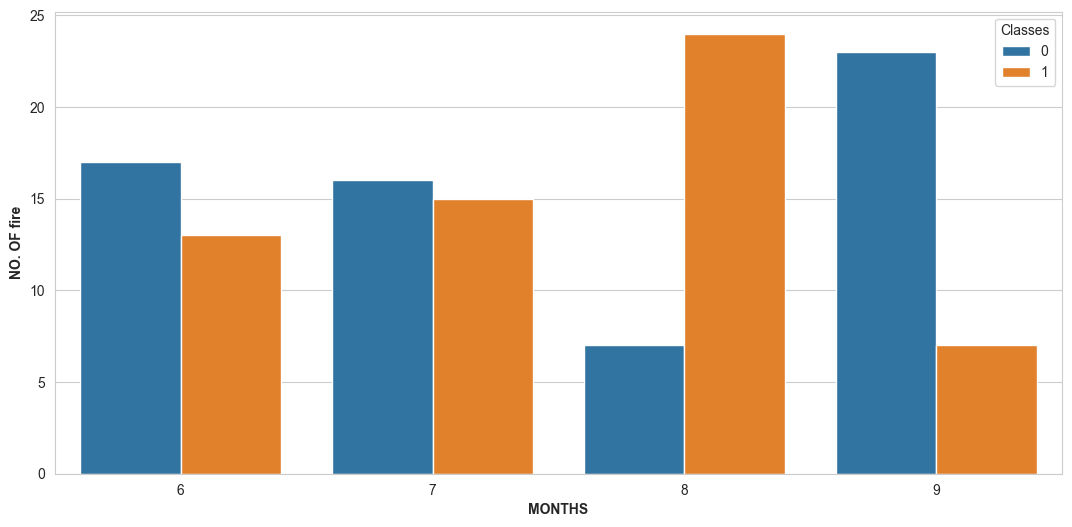

In [121]:
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
palette_color = sns.color_palette('dark') 
sns.countplot(x='month', hue='Classes',data=dftemp)
plt.xlabel('MONTHS', weight='bold')
plt.ylabel('NO. OF fire', weight='bold')

In [127]:
dftemp=df.loc[df['Region']==1]
dftemp

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0,1.0
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0,1.0
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,1.0
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0,1.0
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


Text(0, 0.5, 'Temperature')

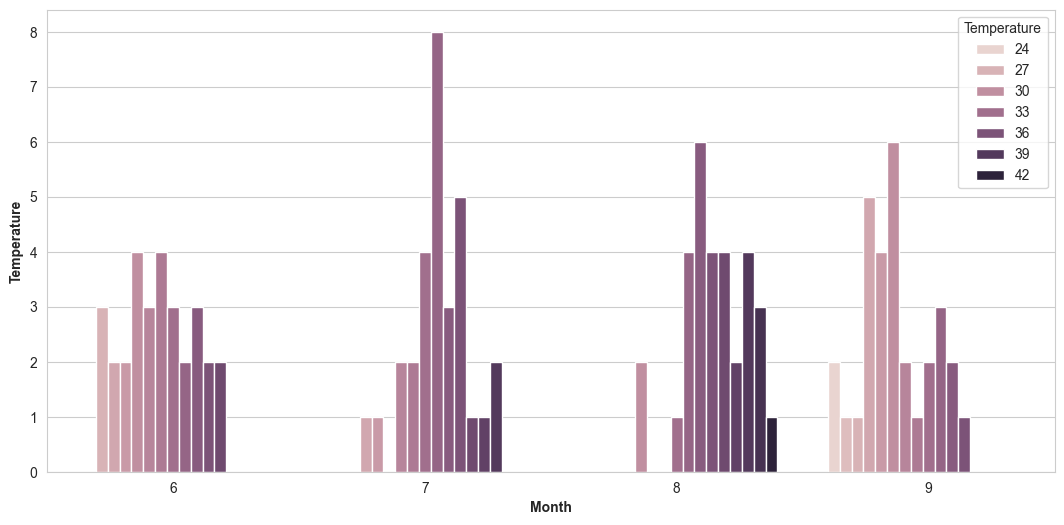

In [128]:
#temprature on baisis of month
# Sidi-Bel Abbes Region 
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
palette_color = sns.color_palette('dark') 
sns.countplot(x='month', hue='Temperature',data=dftemp)
plt.xlabel('Month', weight='bold')
plt.ylabel('Temperature', weight='bold')

Text(0, 0.5, 'Temperature')

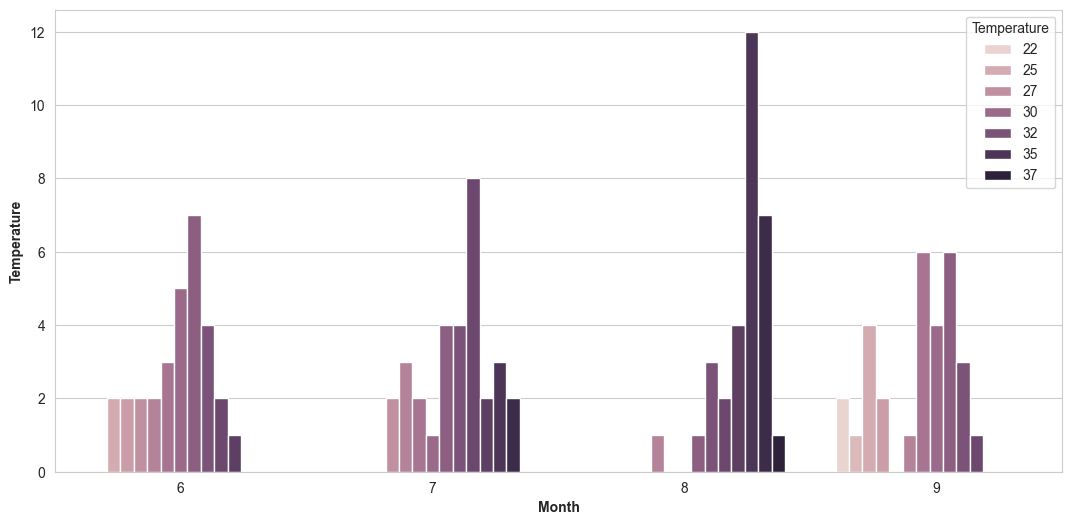

In [129]:
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
palette_color = sns.color_palette('dark') 
sns.countplot(x='month', hue='Temperature',data=dftemp)
plt.xlabel('Month', weight='bold')
plt.ylabel('Temperature', weight='bold')

# Model training

In [130]:
#independent features
X=df.drop('FWI',axis=1)
y=df['FWI']


In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [149]:
print(X_train.shape)
print(X_test.shape)


(182, 14)
(61, 14)


In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
scaler=StandardScaler()

In [152]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [153]:
X_train_scaled

array([[-1.10036414,  1.3585682 ,  0.        , ..., -0.77269802,
        -1.10431526, -0.98907071],
       [ 0.47831144, -1.34865164,  0.        , ..., -0.90344718,
        -1.10431526,  1.01105006],
       [-0.53655144,  0.45616158,  0.        , ...,  0.38339978,
         0.90553851,  1.01105006],
       ...,
       [-1.66417685,  1.3585682 ,  0.        , ..., -1.03419633,
        -1.10431526, -0.98907071],
       [ 1.49317432, -0.44624503,  0.        , ...,  0.18383528,
         0.90553851,  1.01105006],
       [-0.53655144,  1.3585682 ,  0.        , ..., -0.99290713,
        -1.10431526, -0.98907071]])

<Axes: >

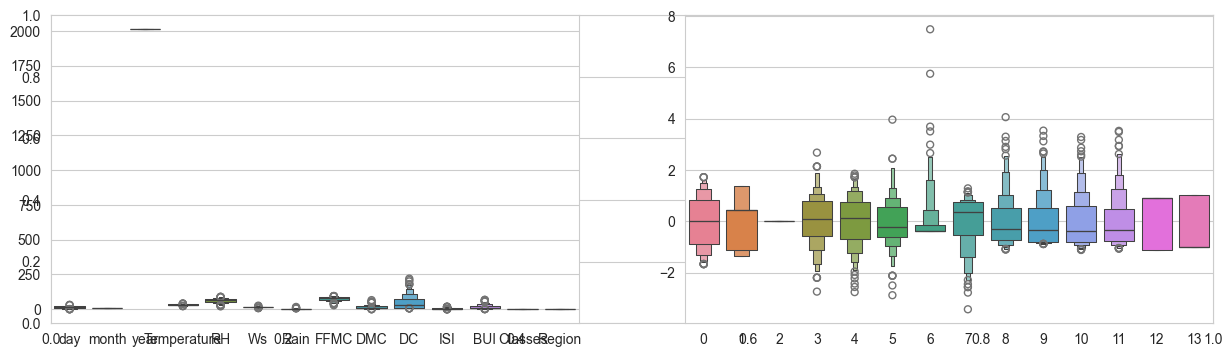

In [162]:
plt.subplots(figsize=(15,4))
sns.set_style('whitegrid')
plt.subplot(1,2,1)
sns.boxenplot(data=X_train)
plt.subplot(1,2,2)
sns.boxenplot(data=X_train_scaled)

 Linear Regression Model

In [164]:
from sklearn.linear_model import LinearRegression
linearReg=LinearRegression()

In [165]:
linearReg.fit(X_train_scaled, y_train)
y_pred=linearReg.predict(X_test_scaled)

In [167]:
from sklearn.metrics import mean_absolute_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae, r2)

0.4758175731357433 0.9892728563308907


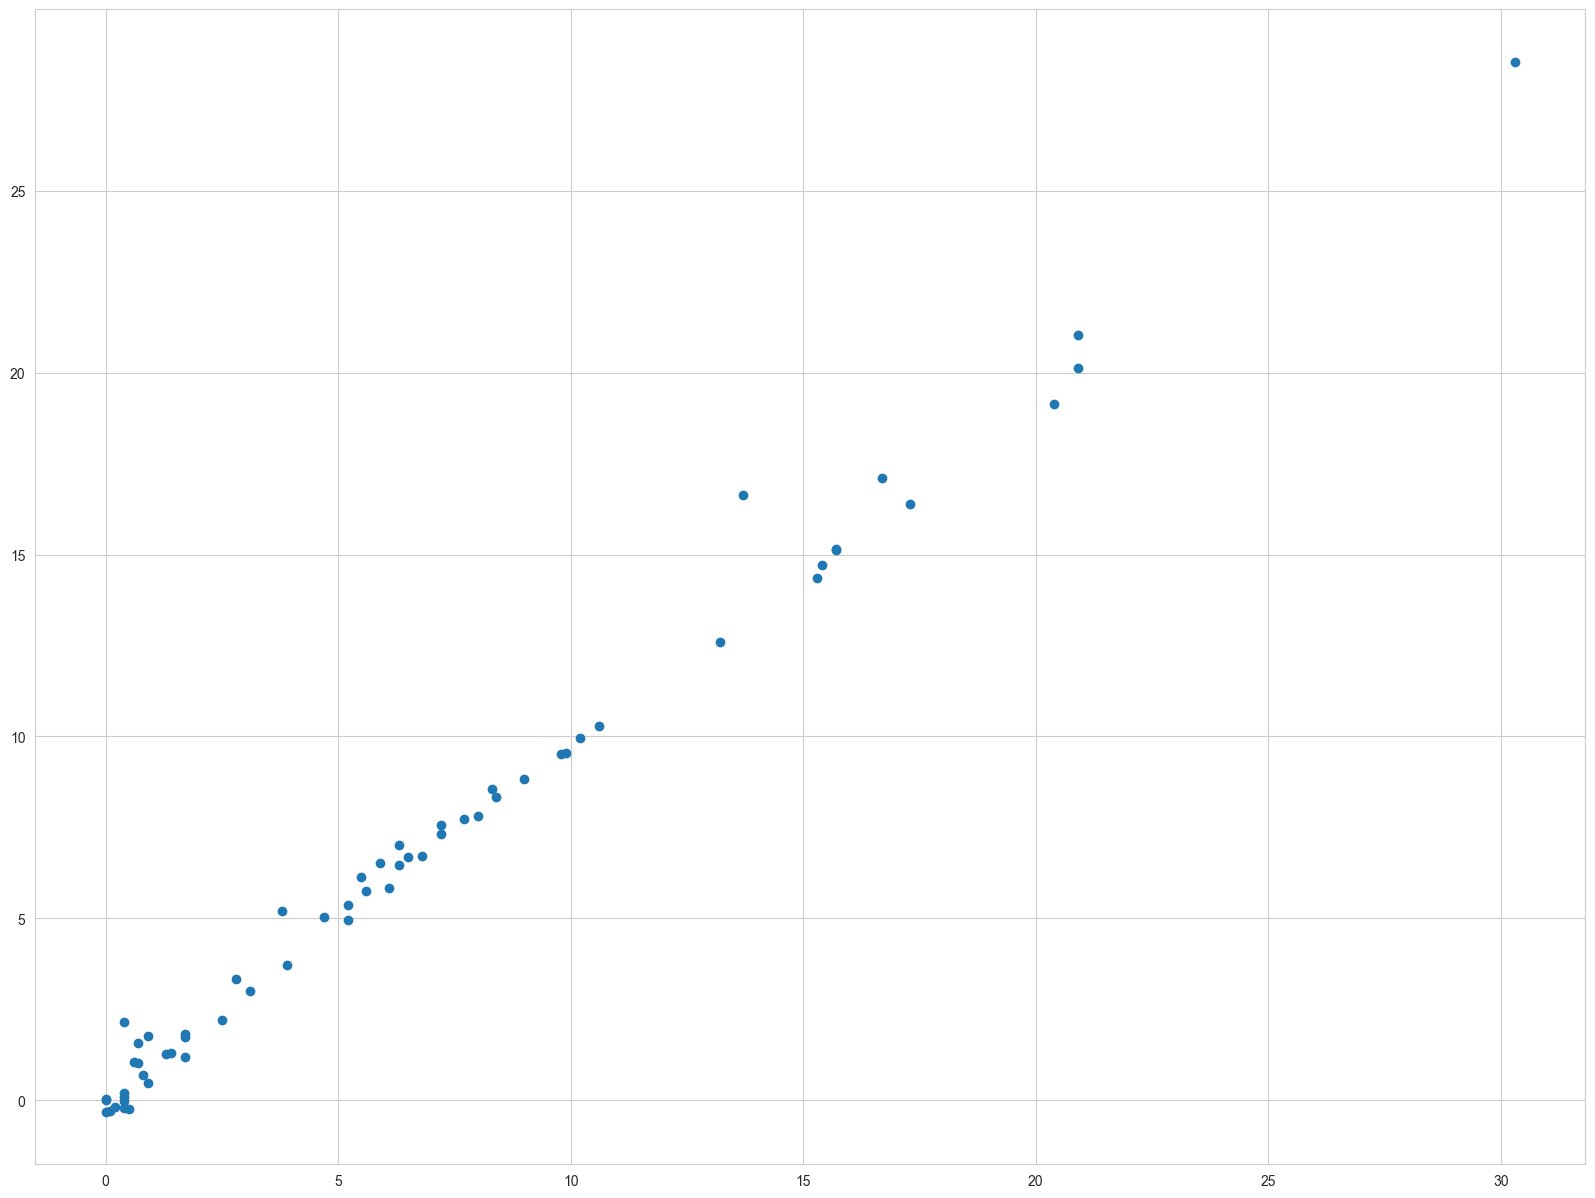

In [168]:
plt.scatter(y_test,y_pred)

1.0816323220340065 0.9548117073146738


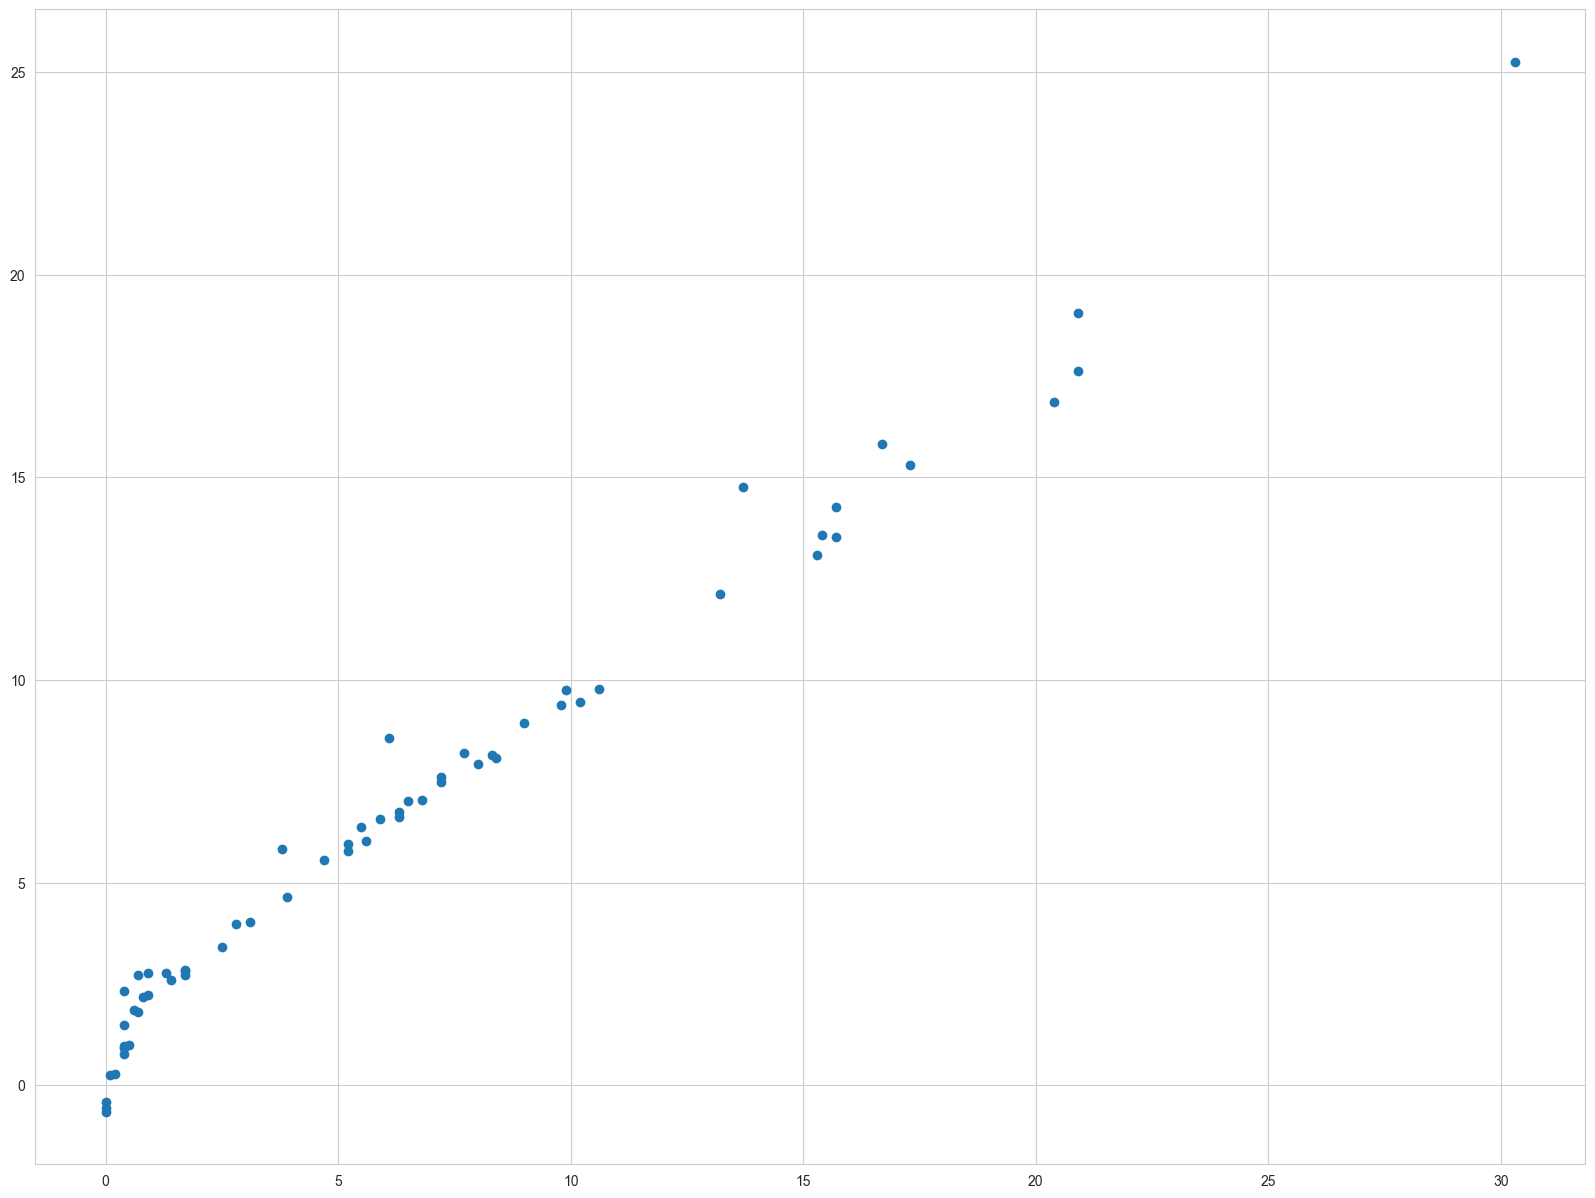

In [170]:
from sklearn.linear_model import Lasso
LassReg=Lasso()
LassReg.fit(X_train_scaled, y_train)
y_pred=LassReg.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae, r2)
plt.scatter(y_test,y_pred)

0.5122077781047937 0.9870959622986031


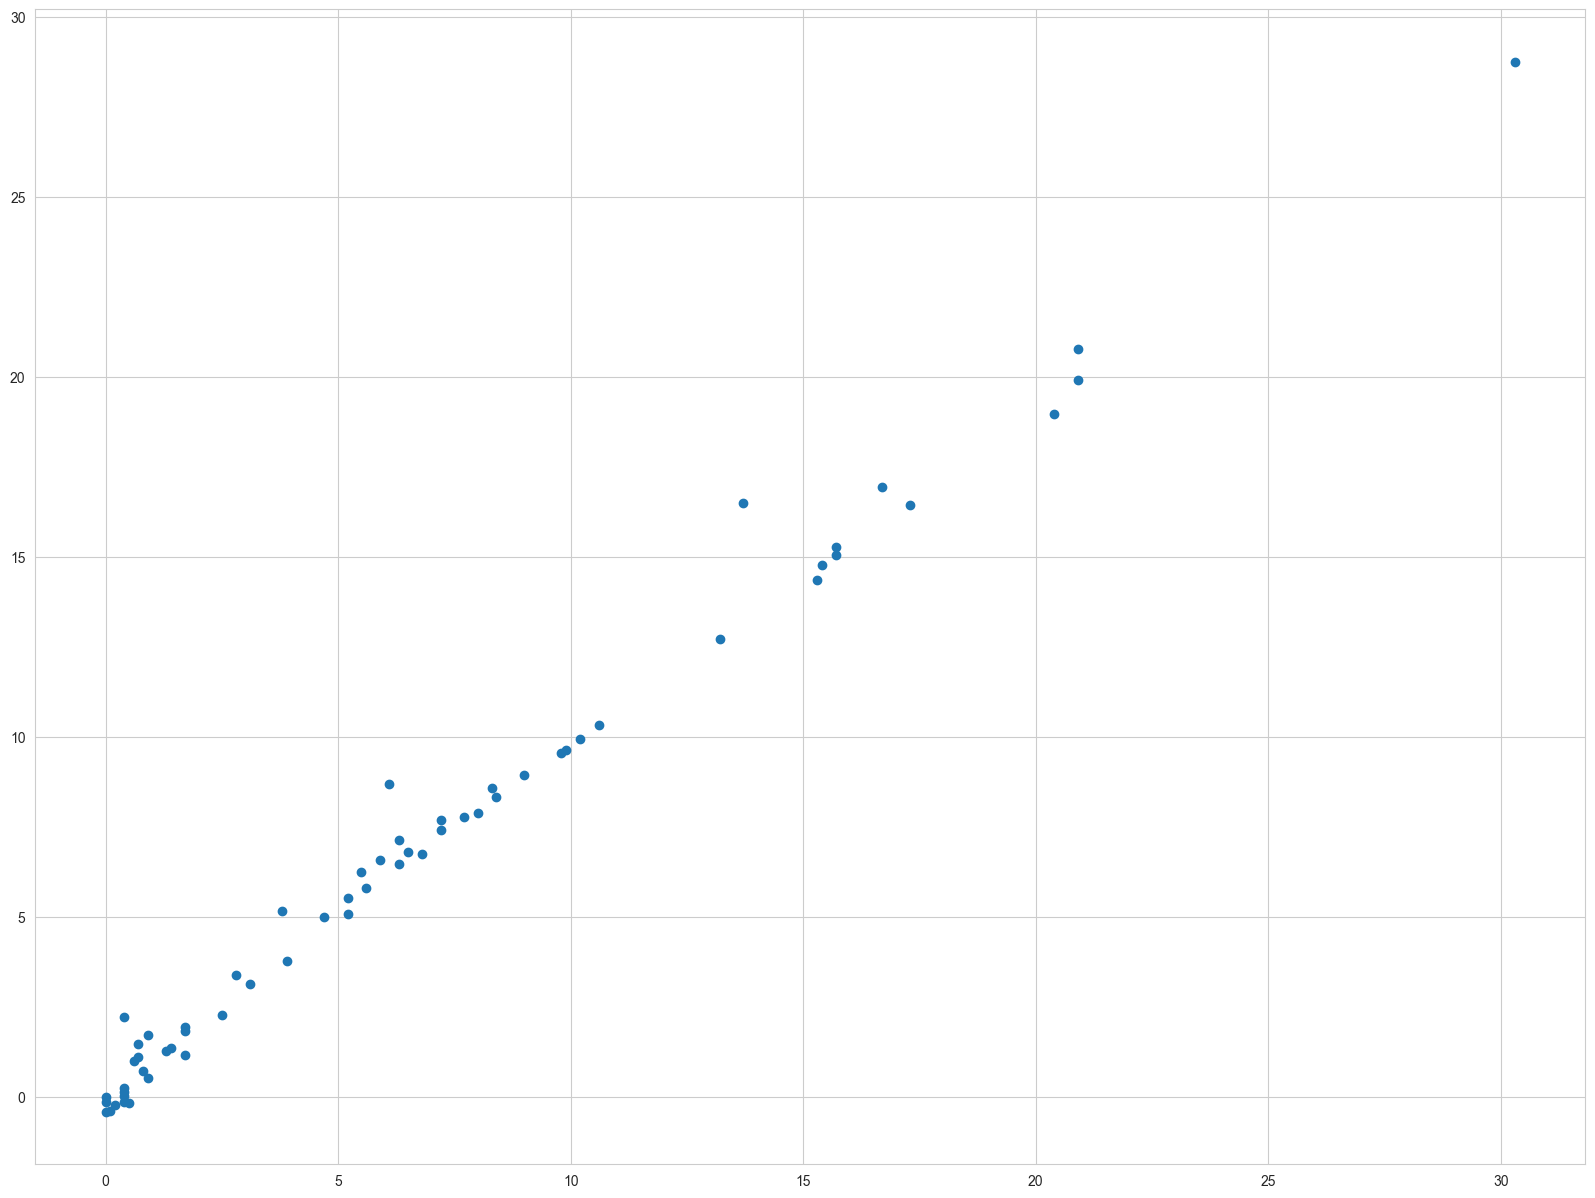

In [171]:
from sklearn.linear_model import Ridge
RidgeReg=Ridge()
RidgeReg.fit(X_train_scaled, y_train)
y_pred=RidgeReg.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae, r2)
plt.scatter(y_test,y_pred)

1.6831601751476266 0.9006649049983613


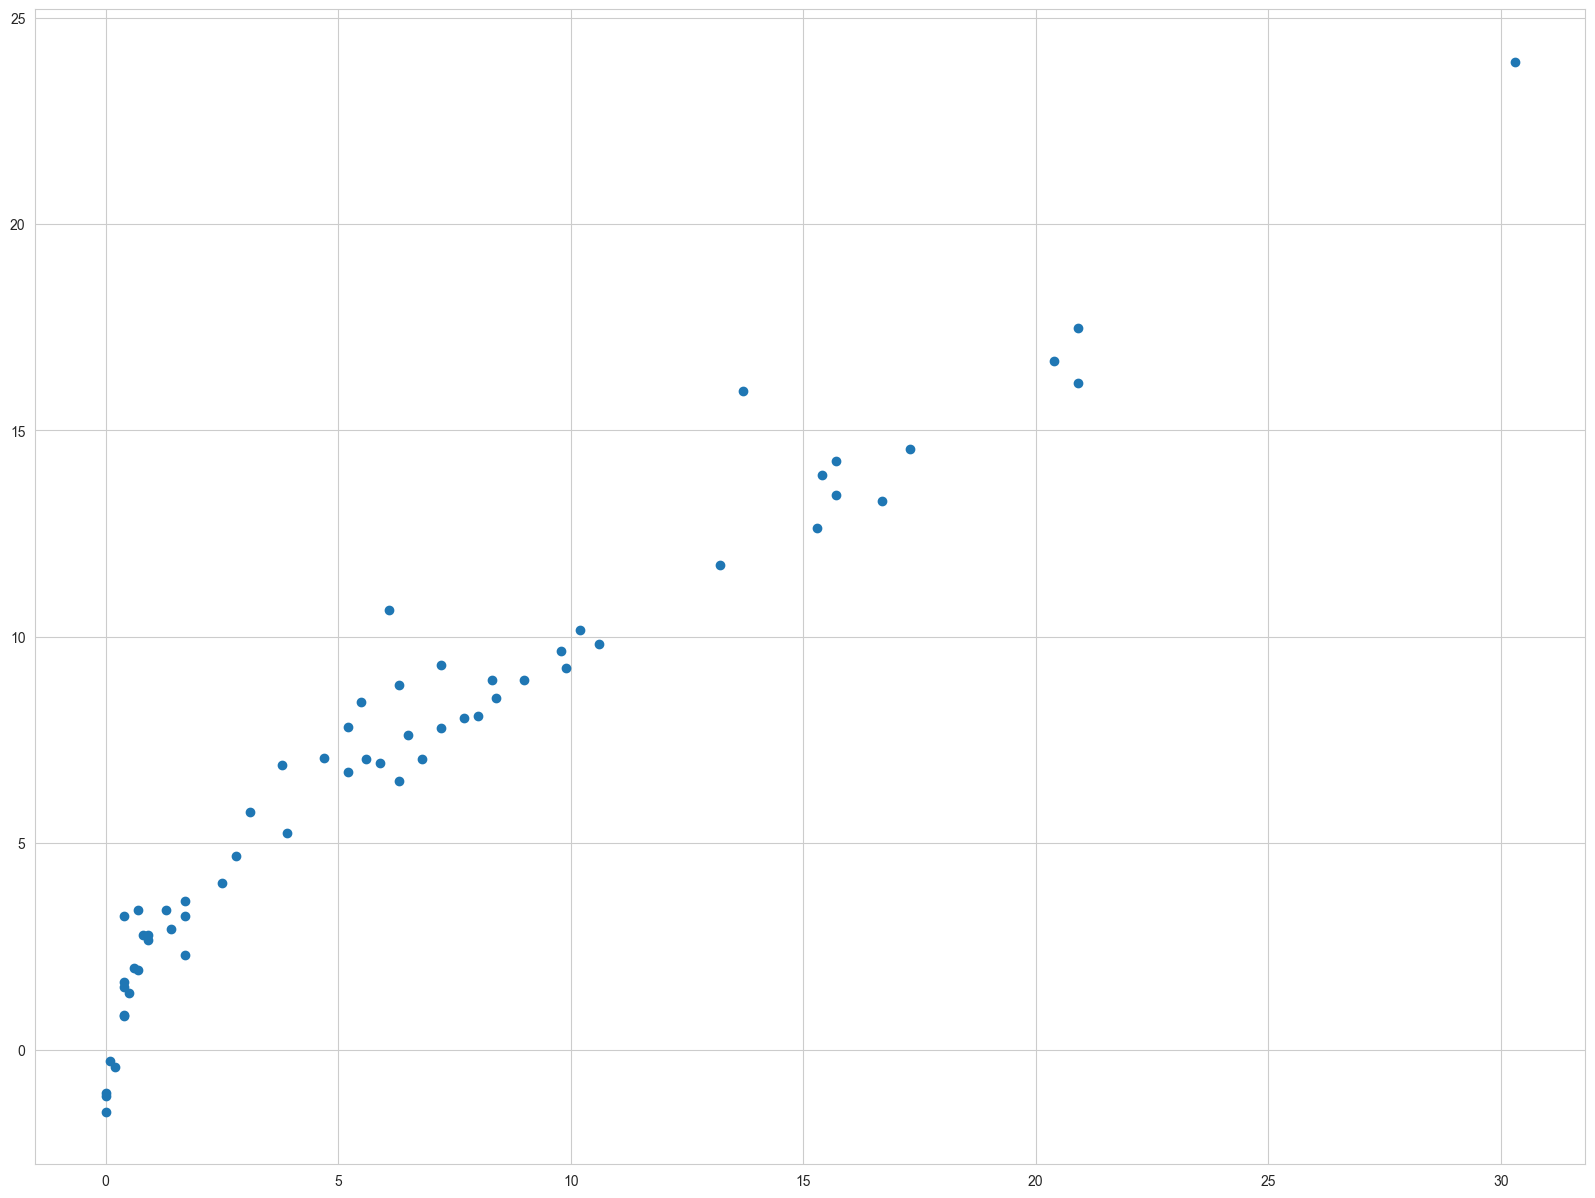

In [172]:
from sklearn.linear_model import ElasticNet
EReg=ElasticNet()
EReg.fit(X_train_scaled, y_train)
y_pred=EReg.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae, r2)
plt.scatter(y_test,y_pred)

In [178]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)


LassoCV(cv=5)

In [179]:
lassocv.predict(X_test_scaled)

array([ 8.21600282e+00,  7.32028223e+00,  7.20045187e-03,  5.55820171e+00,
        6.67775775e+00,  1.73587099e+00,  2.53734449e+00,  7.31086310e+00,
        2.10203838e+00,  3.38647903e+00,  4.83853928e-01,  8.11428939e+00,
        9.48271804e+00,  1.63529647e+01,  1.88390540e+01,  1.70947575e+00,
        1.60603107e+00, -8.17390414e-01,  6.82044011e+00,  3.16715313e+00,
        1.91136729e+00,  2.16395969e-01,  6.27429512e+00, -3.16173028e-02,
        2.08549851e+01,  4.90240716e+00,  5.74443197e+00,  9.87786245e+00,
       -9.48220993e-01,  9.91082742e+00,  6.45796189e+00, -1.14106593e-01,
        1.02234187e+01,  1.48908094e+01,  1.62299252e+00,  1.11698850e+00,
        1.86608003e+00,  6.00464202e+00, -4.61909355e-01, -3.60199045e-01,
        6.79603540e+00,  1.84914267e+00,  8.17988436e+00, -1.00205190e+00,
        1.51475473e+01,  7.88689213e+00,  8.02734214e+00,  9.96194473e-01,
        1.26502951e+01,  9.65296074e-01,  2.81967343e+01,  5.41451947e+00,
        1.70751227e+01,  

In [180]:
lassocv.alpha_

0.07058530018715202

In [181]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.19961097, 14.9991189 ,  9.9

In [187]:
y_lassopred=lassocv.predict(X_test_scaled)

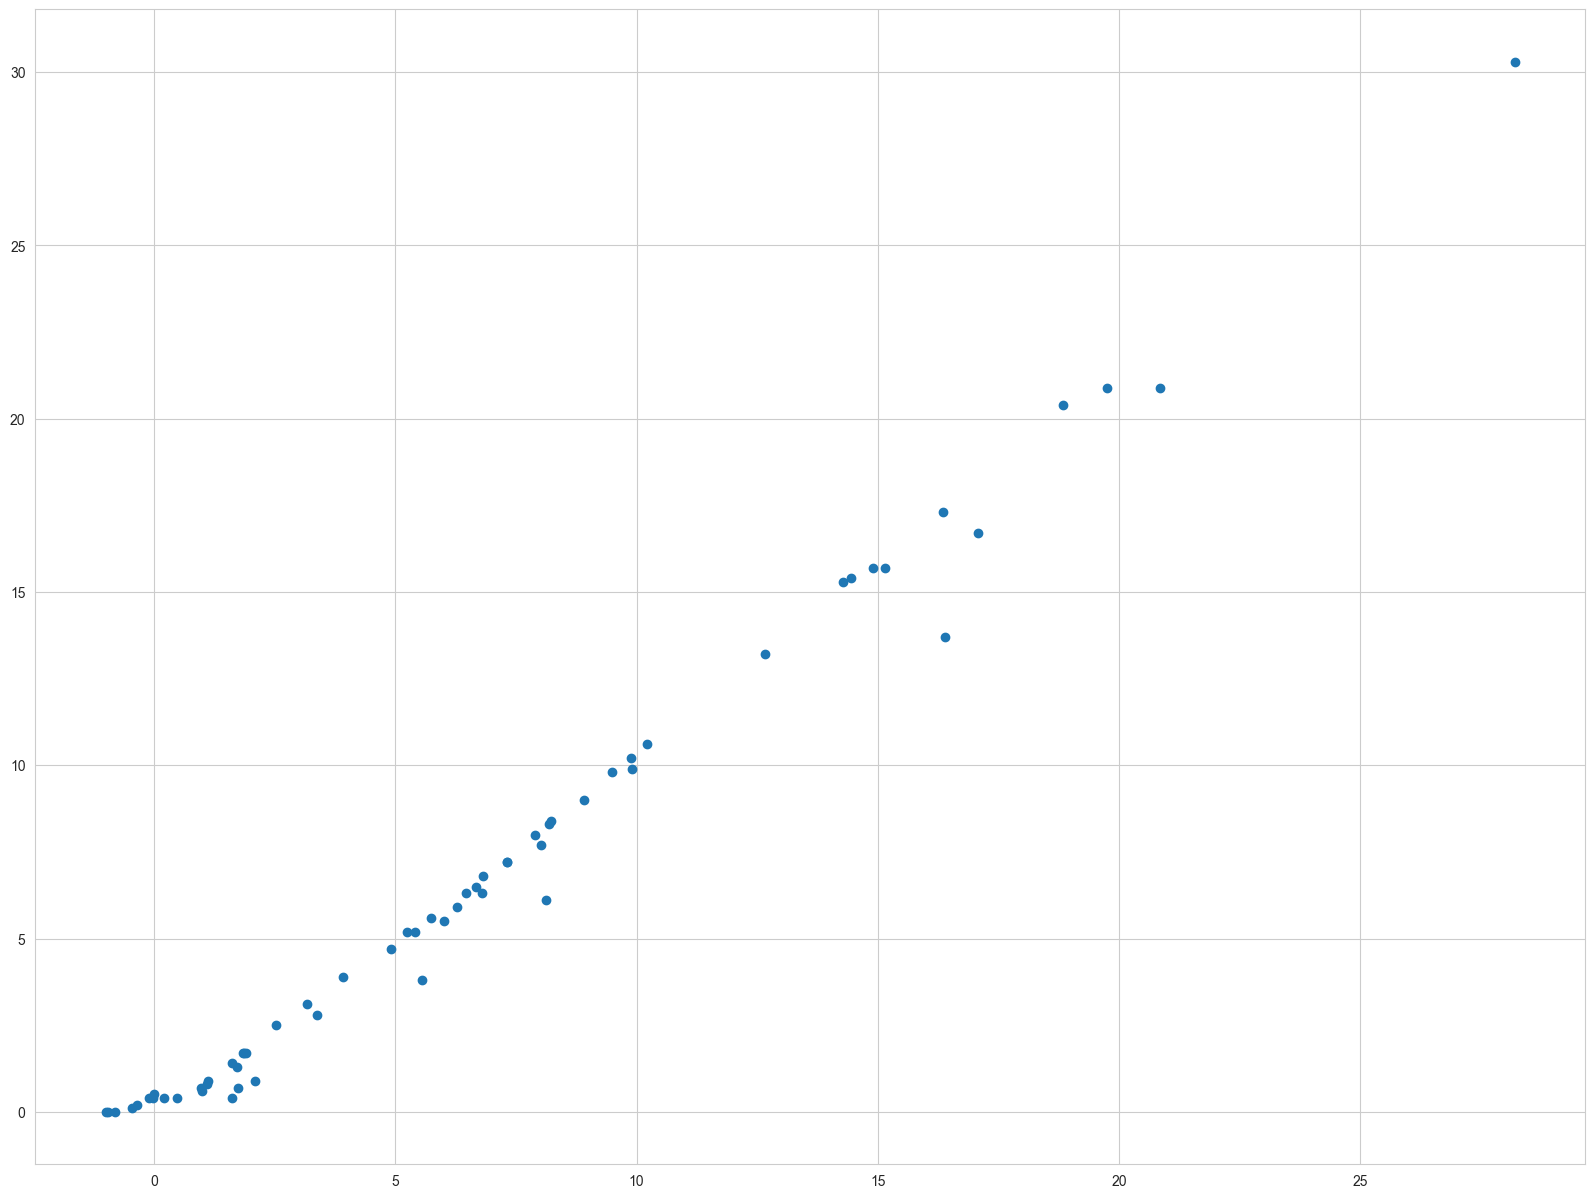

In [188]:
plt.scatter(y_lassopred,y_test)

In [189]:
lassR2=r2_score(y_test,y_lassopred)
lassoMSE=mean_absolute_error(y_test,y_lassopred)
print(lassR2)
print(lassoMSE)

0.9862257529931416
0.5421164892925874


In [191]:
from sklearn.linear_model import RidgeCV
RCV=RidgeCV(cv=5)
RCV.fit(X_train_scaled,y_train)

RidgeCV(cv=5)

In [193]:
RCVpred=RCV.predict(X_test_scaled)
RCVR2=r2_score(y_test,RCVpred)
RCVMSE=mean_absolute_error(y_test,RCVpred)
print(RCVR2)
print(RCVMSE)

0.9870959622986031
0.5122077781047937


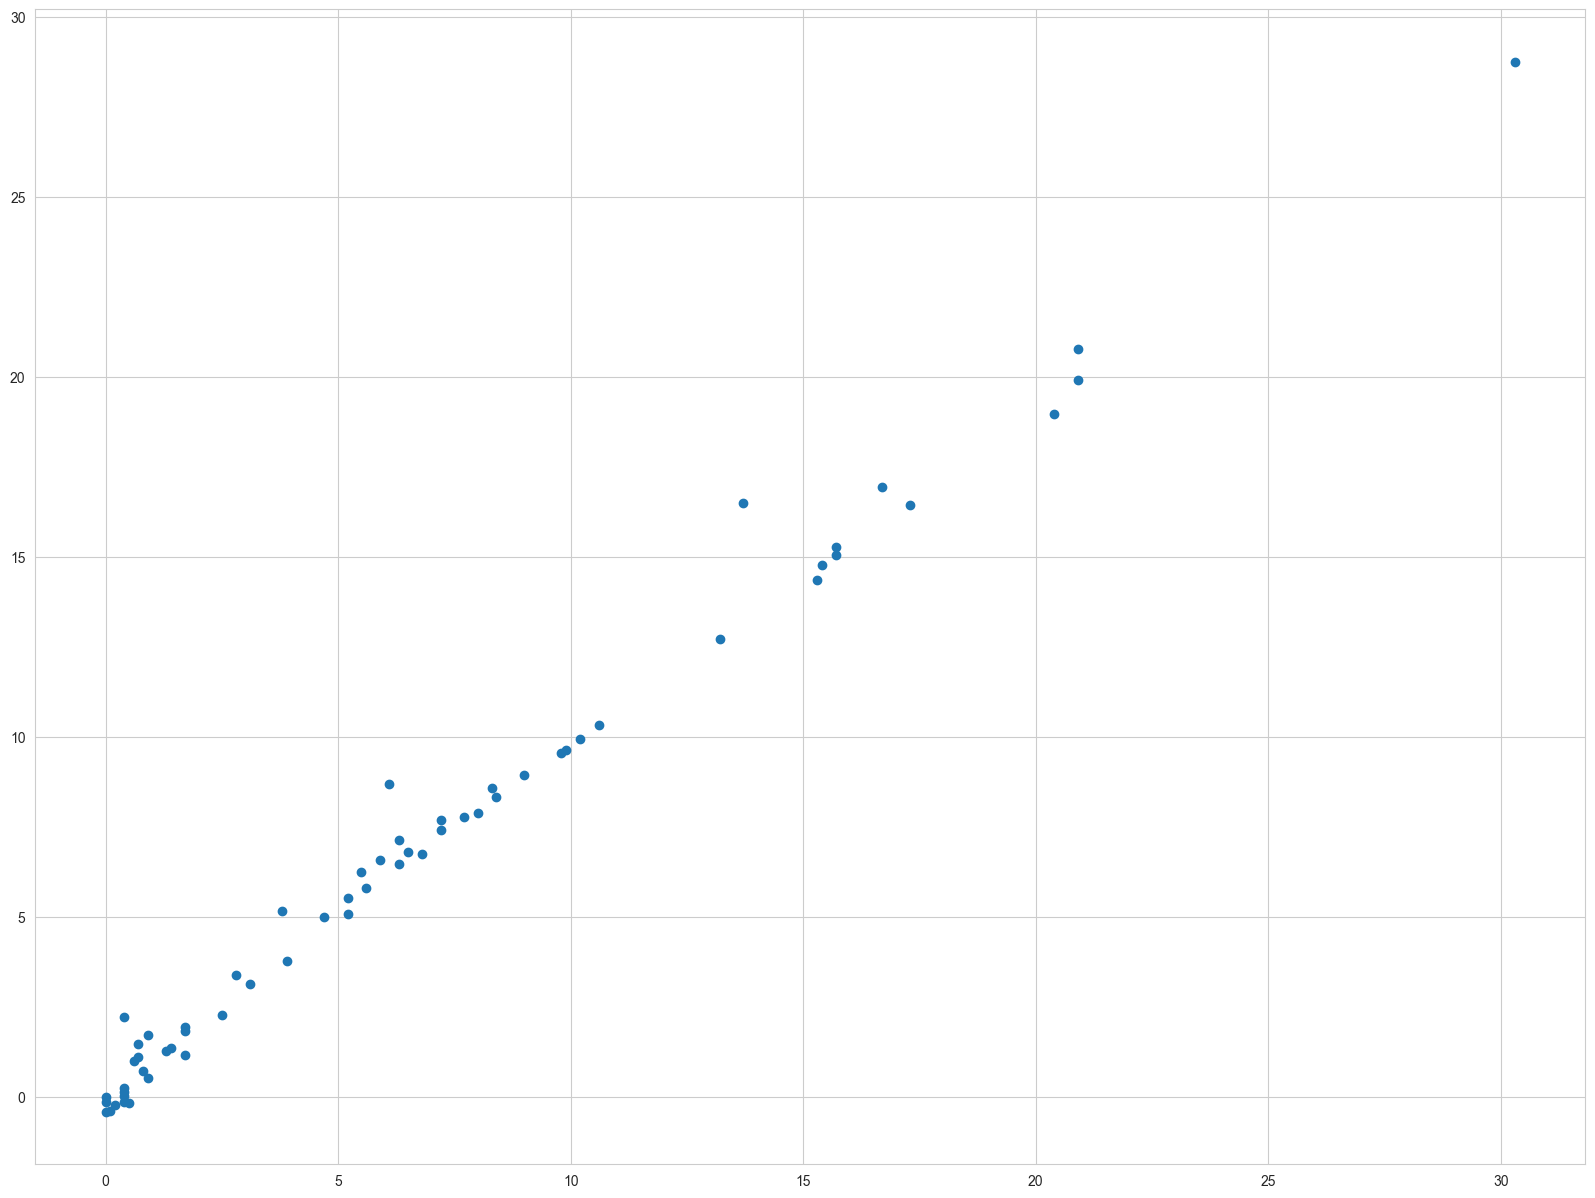

In [194]:
plt.scatter(y_test,RCVpred)

In [196]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(RidgeReg,open('ridge.pkl','wb'))
